In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# Load the dataset
df = pd.read_csv("2023_Global_Markets_Data.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by Ticker and Date
df.sort_values(by=["Ticker", "Date"], inplace=True)

# Calculate Daily Return per Ticker
df["Return"] = df.groupby("Ticker")["Adj Close"].pct_change() * 100

# Drop rows with NaN returns
df.dropna(subset=["Return"], inplace=True)

df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Return
20,000001.SS,2023-01-04,3117.570068,3129.090088,3109.449951,3123.520020,3123.520020,273300.0,0.224931
32,000001.SS,2023-01-05,3132.760010,3159.429932,3130.229980,3155.219971,3155.219971,257000.0,1.014879
44,000001.SS,2023-01-06,3155.070068,3170.739990,3151.840088,3157.639893,3157.639893,257400.0,0.076696
55,000001.SS,2023-01-09,3169.370117,3183.580078,3165.429932,3176.080078,3176.080078,258100.0,0.583986
67,000001.SS,2023-01-10,3178.020020,3178.159912,3165.139893,3169.510010,3169.510010,233000.0,-0.206861


In [4]:
df.describe()


,Date,Open,High,Low,Close,Adj Close,Volume,Return
count,1700,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000
mean,2023-04-16 21:30:55.058823424,15708.974509,15784.867887,15629.094571,15713.361336,15713.361336,1.235917e+09,0.083652
min,2023-01-03 00:00:00,66.620003,67.699997,63.639999,66.739998,66.739998,0.000000e+00,-5.316527
25%,2023-02-23 18:00:00,2030.875031,2042.800049,2015.499969,2028.024994,2028.024994,2.613575e+05,-0.434803
50%,2023-04-18 00:00:00,8008.449951,8017.250000,7968.150146,8008.449951,8008.449951,1.523608e+08,0.096918
75%,2023-06-08 00:00:00,19810.136719,19872.513184,19719.386719,19792.013184,19792.013184,2.334748e+09,0.639759
max,2023-07-28 00:00:00,67074.343750,67619.171875,66831.382812,67571.898438,67571.898438,9.354280e+09,6.277257
std,NaN,17380.248497,17453.852732,17296.219217,17379.656615,17379.656615,1.919118e+09,1.016601


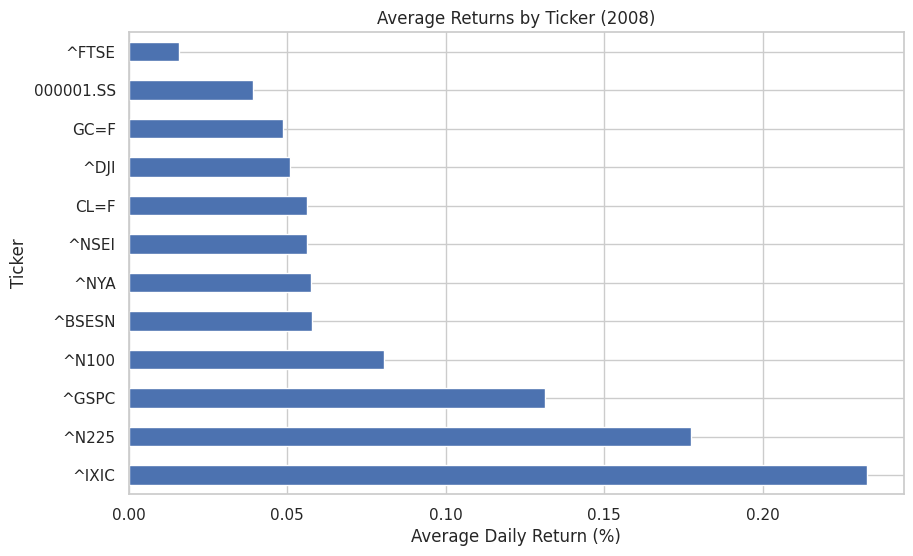

In [5]:
#Q1: What are the top-performing tickers based on average return?
top_tickers = df.groupby("Ticker")["Return"].mean().sort_values(ascending=False)
top_tickers.plot(kind='barh', title="Average Returns by Ticker (2008)")
plt.xlabel("Average Daily Return (%)")
plt.show()


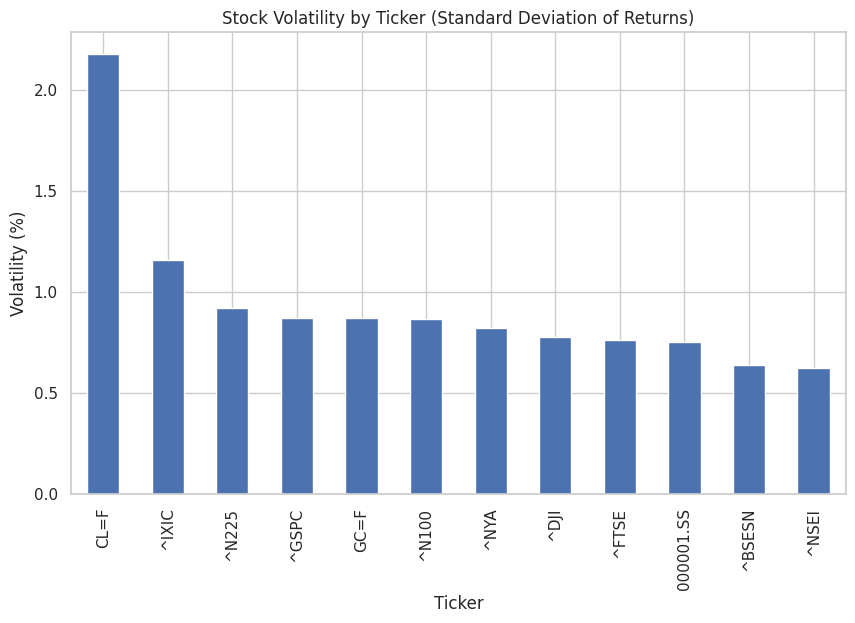

In [6]:
# Q2: What are the most volatile stocks?
volatility = df.groupby("Ticker")["Return"].std().sort_values(ascending=False)
volatility.plot(kind='bar', title="Stock Volatility by Ticker (Standard Deviation of Returns)")
plt.ylabel("Volatility (%)")
plt.show()

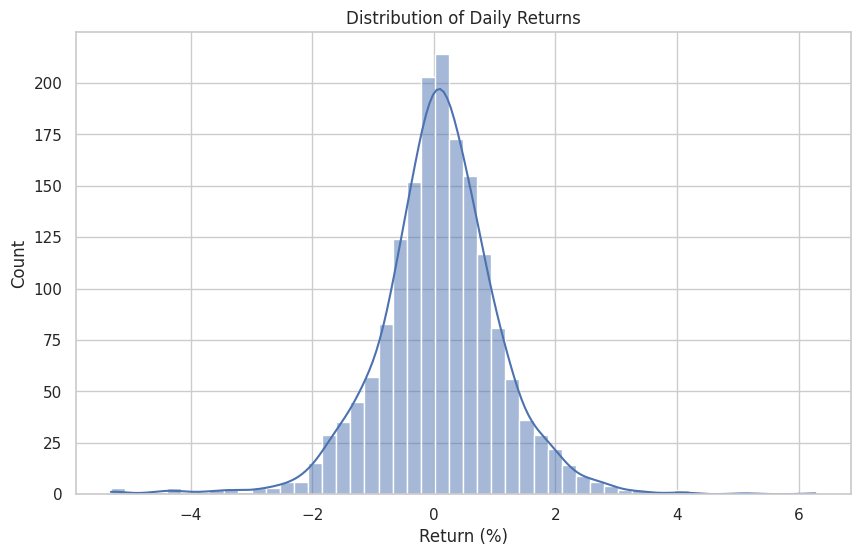

In [7]:
#Q3: Distribution of daily returns
sns.histplot(df["Return"], bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Return (%)")
plt.show()


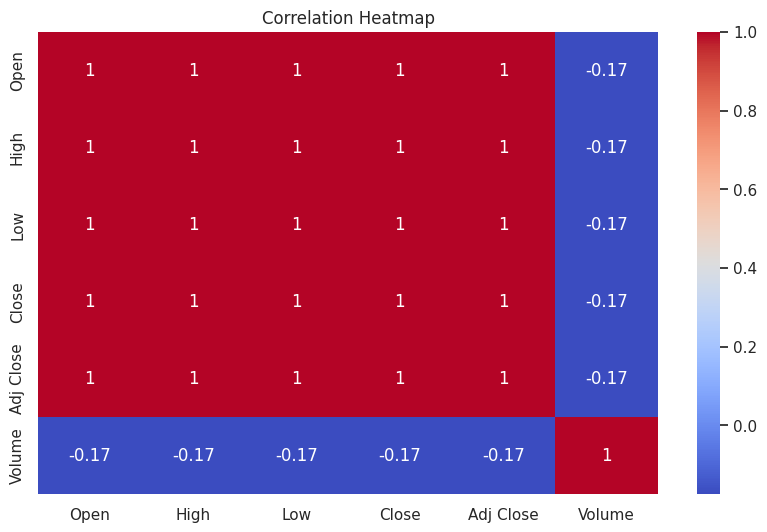

In [8]:
#Q4: Correlation among numerical features
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
#Q5: Which stock had the highest single-day return?
max_return = df.loc[df["Return"].idxmax()]
print("Highest Return:")
print(max_return)


Highest Return:
Ticker                      CL=F
Date         2023-04-03 00:00:00
Open                   80.099998
High                   81.690002
Low                         79.0
Close                  80.419998
Adj Close              80.419998
Volume                  547126.0
Return                  6.277257
Name: 755, dtype: object


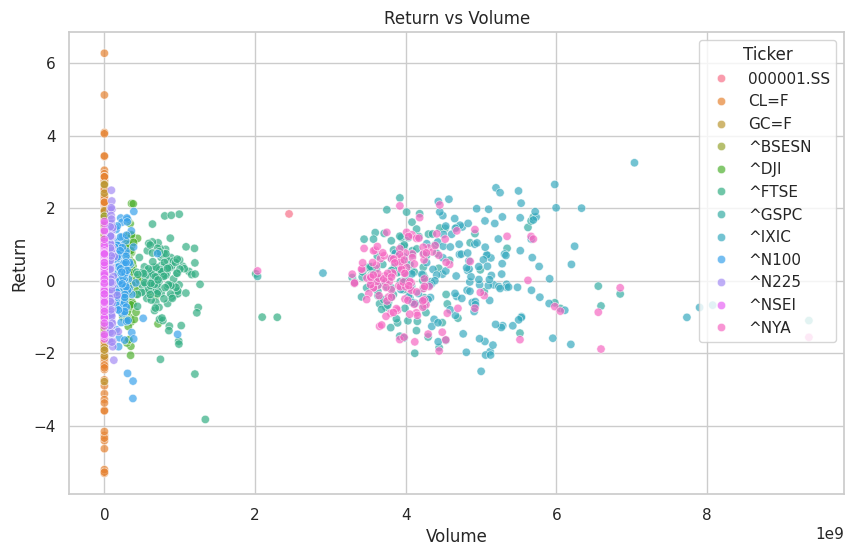

In [10]:
#Q6: Return vs Volume (scatter)
sns.scatterplot(data=df, x="Volume", y="Return", hue="Ticker", alpha=0.7)
plt.title("Return vs Volume")
plt.show()


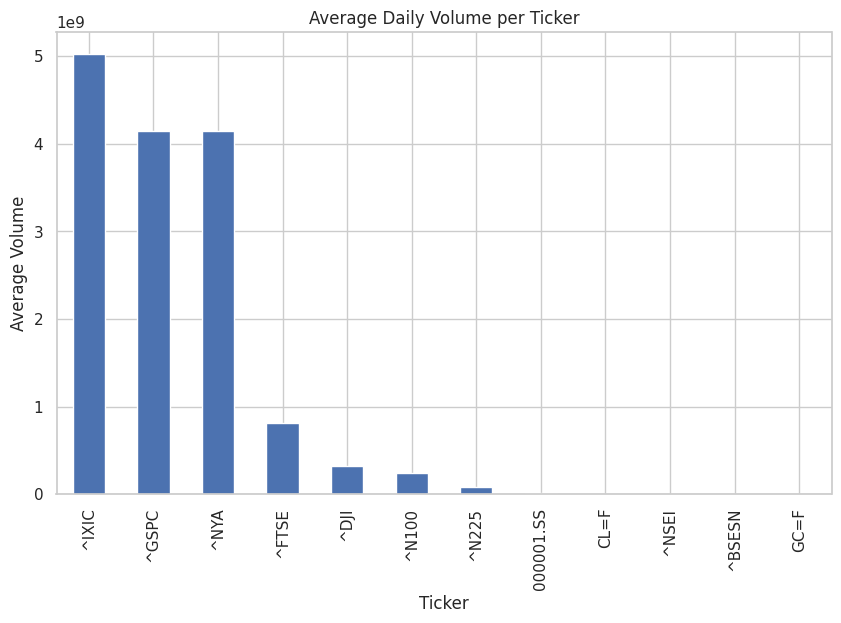

In [11]:
#Q7: Average daily volume per ticker
avg_volume = df.groupby("Ticker")["Volume"].mean().sort_values(ascending=False)
avg_volume.plot(kind='bar', title="Average Daily Volume per Ticker")
plt.ylabel("Average Volume")
plt.show()


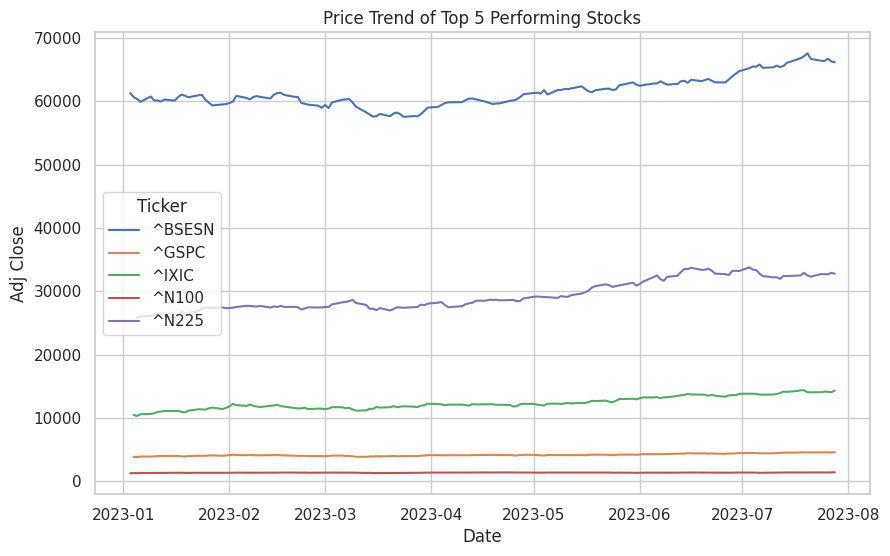

In [12]:
#Q8: Price trend over time for selected stocks
selected = df[df["Ticker"].isin(top_tickers.head(5).index)]
sns.lineplot(data=selected, x="Date", y="Adj Close", hue="Ticker")
plt.title("Price Trend of Top 5 Performing Stocks")
plt.show()



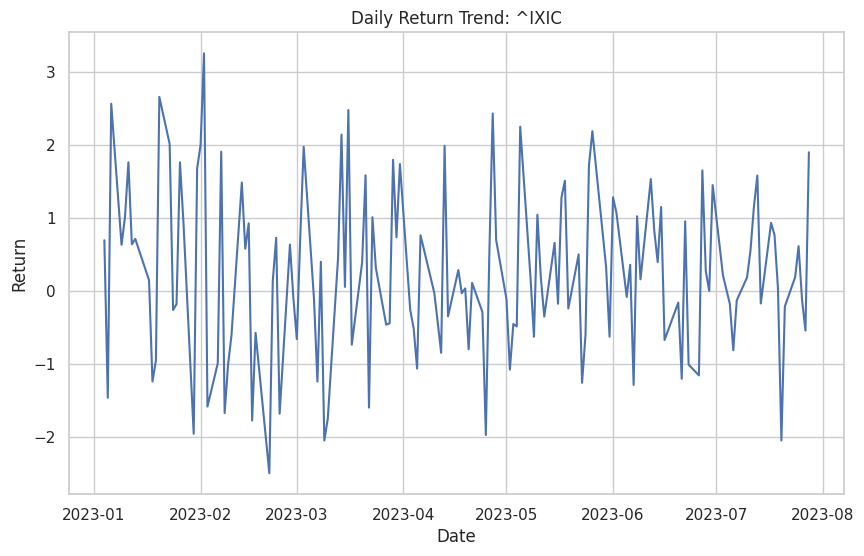

In [13]:
#Q9: Daily return trend for a selected stock
ticker = top_tickers.idxmax()
ticker_df = df[df["Ticker"] == ticker]
sns.lineplot(data=ticker_df, x="Date", y="Return")
plt.title(f"Daily Return Trend: {ticker}")
plt.show()


In [14]:
# Q10: Interactive scatter of Return vs Volume
fig = px.scatter(df, x="Volume", y="Return", color="Ticker",
                 hover_data=["Date"], title="Return vs Volume (Interactive)")
fig.show()


In [15]:
summary = {
    "Top Performing Stock": top_tickers.idxmax(),
    "Most Volatile Stock": volatility.idxmax(),
    "Highest Single-Day Return": round(df["Return"].max(), 2),
    "Ticker With Max Return": df.loc[df["Return"].idxmax()]["Ticker"]
}
summary


{'Top Performing Stock': '^IXIC',
 'Most Volatile Stock': 'CL=F',
 'Highest Single-Day Return': 6.28,
 'Ticker With Max Return': 'CL=F'}